# Sleep Study Dataset Analysis

My goal for this analysis was to understand human sleep behaviour using the "sleepstudy.csv" dataset. The dataset has information about the sleep duration, efficieny, REM, deep, and light sleep percentages of the participants. As well as some lifestyle factors like caffeine and alcohol consumption, exercise frequency, and smoking status. Using this data, we have the goal to understand how demographic facotrs and habits in the daily life influence sleep quality and duration. 

This analysis will include statistics, visualizations, and correlations to provide insights into which factors are most strongly associated with better or worse sleep. Understanding the patterns in the dataset can help with knowing healthier habits for sleep and overall lifestyle.

In [1]:
#Load Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load csv file and check if it loaded correctly
df = pd.read_csv("sleepstudy.csv")
#df.head()

In [3]:
#Summary Statistics
df.describe(include = "all")

,ID,Age,Gender,Bedtime,WakeupTime,SleepDuration,SleepEfficiency,REMSleepPercentage,DeepSleepPercentage,LightSleepPercentage,Awakenings,CaffeineConsumption,AlcoholConsumption,SmokingStatus,ExerciseFrequency
count,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,744.000000,1000.000000,1000,1000.000000
unique,NaN,NaN,2,1000,990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,Male,2025-09-30 7:32,42:25.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN
freq,NaN,NaN,513,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,513,NaN
mean,500.500000,50.125000,NaN,NaN,NaN,7.027443,0.720150,22.460000,47.357000,30.183000,2.539000,25.168011,2.560000,NaN,2.565000
std,288.819436,18.076397,NaN,NaN,NaN,1.135365,0.128139,4.589059,13.097293,13.788968,1.726691,20.446036,1.746267,NaN,1.712515
min,1.000000,18.000000,NaN,NaN,NaN,5.002335,0.500000,15.000000,25.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,250.750000,34.000000,NaN,NaN,NaN,6.076980,0.610000,18.000000,36.000000,18.000000,1.000000,0.000000,1.000000,NaN,1.000000
50%,500.500000,51.000000,NaN,NaN,NaN,6.981505,0.720000,22.000000,47.000000,30.000000,3.000000,25.000000,3.000000,NaN,3.000000
75%,750.250000,65.000000,NaN,NaN,NaN,8.039587,0.830000,27.000000,59.000000,42.000000,4.000000,50.000000,4.000000,NaN,4.000000


In [4]:
#Count missing values in each column
df.isnull().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
WakeupTime                0
SleepDuration             0
SleepEfficiency           0
REMSleepPercentage        0
DeepSleepPercentage       0
LightSleepPercentage      0
Awakenings                0
CaffeineConsumption     256
AlcoholConsumption        0
SmokingStatus             0
ExerciseFrequency         0
dtype: int64

In [5]:
#Shape of dataset to help with Basic Summary section
df.shape

(1000, 15)

In [6]:
#Figuring out the percentage of smokers for descriptive insights

smoker_percentage = (df['SmokingStatus'] == 'Yes').mean() * 100
print(round(smoker_percentage, 2))


51.3


## Basic Summary

This dataset has info on participants sleep paterns and lifestyle habits. Columns include SleepDuration, SleepEfficiency, REMSleepPercentage, DeepSleepPercentage, LightSleepPercentage, lifestyle habits like CaffeineConsumption, AlcoholConsumption, SmokingStatus, and ExerciseFrequency, along with Age and Gender. There are 1000 columns and 15 rows with 256 entries in "CaffeineConsumption" being blank.

## Descriptive Statistics

### Age

Participants range from 18-80 years old, wiht a median age of 51. The IQR shows that most participants are on the older side (34-65)

### Sleep Duration

On average participants sleep about 7 hours per night (mean = 7.027 hours), with a range of 5 to 9 hours across the whole dataset. Most of the dataset falls between the 6-8 hour range (the IQR).

### Sleep Efficiency

Average sleep efficency is around 72% with most participants between 61% and 83% (the 25th and 75th percentile respect). Some participants however, have very low sleep efficency (50%), while some reach a very high efficiency (95%).

### Sleep Stages

REM Sleep (~22% of total sleep):

REM (Rapid Eye Movement) sleep is the stage of sleep where dreaming occurs, characterized by high brain activity, increased heart rate, and temporary paralysis of major muscles. REM sleep is CRUCIAL for high quality sleep with the optimal amount comprising of 20-25% of your total sleep duration (essentially too much is bad). Participants spend roughs a fifth of their sleep in REM, which is normal.

Source: National Institutes of Health (https://www.nhlbi.nih.gov/health/sleep/stages-of-sleep and https://pmc.ncbi.nlm.nih.gov/articles/PMC2847051/)



Deep Sleep (~47% of total sleep):

Deep sleep is the most restorative stage of sleep. It helps the body recover, strengthens the immunge system, and supports muscle and tissue repair. Deep sleep is the largest portion of sleep. This number indicates participants are getting enough restorative sleep even when the total sleep duration varies.

Source: Sleep Foundation (https://www.sleepfoundation.org/stages-of-sleep/deep-sleep)

Light Sleep (~30% of total sleep):

Light sleep is the stage between waking up and deep sleep. Easier to wake up from and plays a role in physical recover and memory consolidation but is lest restorative than deep sleep. Participants spend about 30% which is normal.

Source: CLMSleep (https://www.clmsleep.com/light-sleep/)

### Awakenings

Participants experience 0-5 awakenings per night, with a median of 3, suggesting sleep interruptions are common. Upon research, sleepless nights are  common with approximately 2 in 5 Canadians experiencing sleepless nights according to Stats Canada.

Source: Statistics Canada (https://www.statcan.gc.ca/o1/en/plus/1653-cant-sleep-count-sheep)

### Lifestyle Factors

Exercise Frequency: Most participants exercise 0-5 days per week (median 3). More frequent exercise is generally linked to better sleep quality

Caffeine Consumption: Caffeine intake varies widely (0-50 mg/day). Higher caffeince use may reduce sleep duration or efficiency

Alcohol Consumption: Alcohol consumption ranges 0-5 ounces per day. Higher alcohol can interrupt sleep cycles and ruin sleep quality

Smoking Status: About half of the participants being smokers. Nicotine can negatively effect sleep duration and efficiency

## Visual Analysis

### Distribution of Sleep Duration

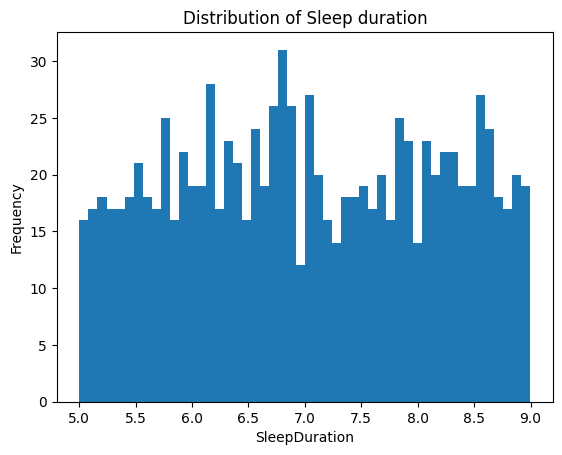

In [7]:
plt.hist(df["SleepDuration"], bins=50)

plt.xlabel("SleepDuration")
plt.ylabel("Frequency")
plt.title("Distribution of Sleep duration")

plt.show()

Sleep duration is fairly distributed between 5 and 9 hours suggesting that the sample reflects a realistic adult sleeping behaviour rather than outliers like sleep deprivation or oversleeping. This lets us know that the dataset is good for studying NORMAL sleep patterns.

### Average Sleep Duration by Gender

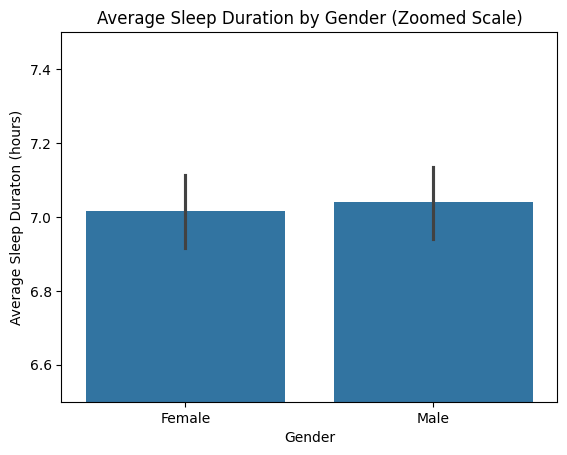

In [8]:
sns.barplot(
    data=df,
    x="Gender",
    y="SleepDuration"
)

plt.ylim(6.5,7.5) #this changes the rnage of the y axis, allowing for a more zoomed visual

plt.title("Average Sleep Duration by Gender (Zoomed Scale)")
plt.ylabel("Average Sleep Duraton (hours)")

plt.show()

The graph shows that males and females have very similar average sleep durations, with males only being slightly more. The lack of difference between these two demographics suggests that there may be other factors that contribute to higher quality sleep and duration.

### Caffeine Consumption vs Sleep Duration

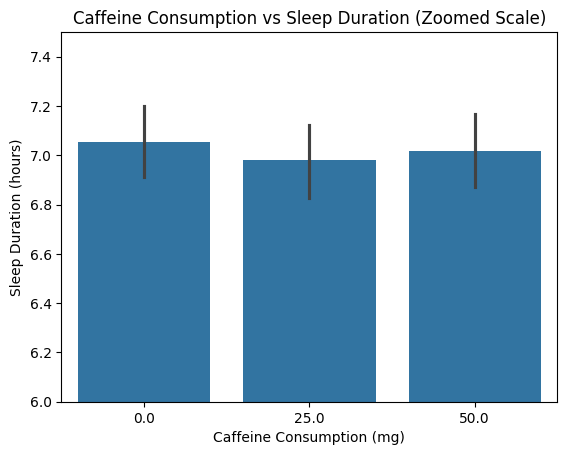

In [9]:
sns.barplot(
    data=df,
    x="CaffeineConsumption",
    y="SleepDuration"
)
plt.ylim(6,7.5) #same zoomed scale code

plt.title("Caffeine Consumption vs Sleep Duration (Zoomed Scale)")
plt.ylabel("Sleep Duration (hours)")
plt.xlabel("Caffeine Consumption (mg)")

plt.show()

Higher caffeine consumption is generally associated with shorter sleep duration but the visual shows noticeable variability. In this visual sleep duration appears to slightly decrease with moderate caffeine intake (around 25mg), but then increases again at a higher intake (50mg). This suggests that caffeine's effect on sleep is not consistent across the Caffeine Consumption levels in this dataset. 

There are three things to consider with the caffeine consumption part of the dataset:
1. Some people may have a higher tolerance to caffeine which can cause high individual variability.
2. This column in the dataset had a large number of missing entries (256) which raises concerns about the quality of it and therefore, the reliability of it.
3. This dataset handles smaller quantities of caffeine consumption, if you want to see the impact of caffeine on sleep specifically it would be better to use data that includes higher consumptions of caffeine such as 100mg-400mg (400mg is the safe limit for caffeine consumption so it may be difficult to find people who consume this much).

These results are consistent with research from the Sleep Foundation, which reports that caffeine could interfere with sleep depending on the sensitivity of the consumer.
(https://www.sleepfoundation.org/nutrition/caffeine-and-sleep)

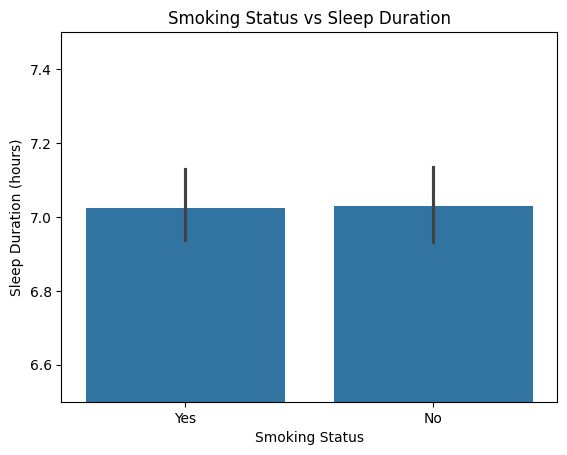

In [10]:
sns.barplot(
    data=df,
    x="SmokingStatus",
    y="SleepDuration"
)
plt.ylim(6.5,7.5)

plt.title("Smoking Status vs Sleep Duration")
plt.ylabel("Sleep Duration (hours)")
plt.xlabel("Smoking Status")

plt.show()

Non-smokers and smokers show nearly identical average sleepdurations, with smokers sleeping only marginally less. This suggests that smoking status alone does not strongly predict sleep duration in this dataset, but still may effect other parts of sleep such as restlessness or sleep quality. ALthough the difference is very small, it aligns with other studies done by various organizations such as the one from the National Institutes of Health (https://pmc.ncbi.nlm.nih.gov/articles/PMC12357650/), making the visualization informative and relevant.

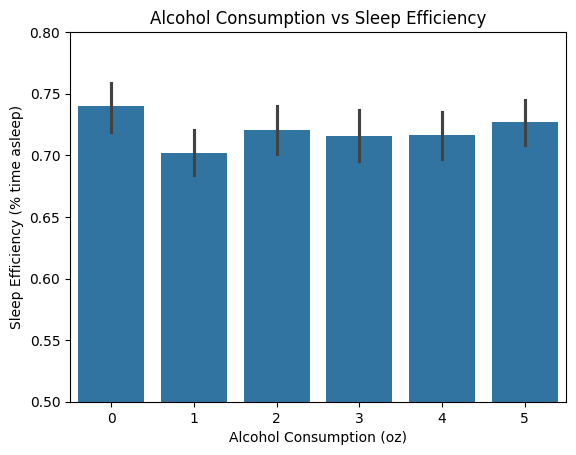

In [11]:
sns.barplot(
    data=df,
    x="AlcoholConsumption",
    y="SleepEfficiency"
)
plt.ylim(0.5,0.8)

plt.title("Alcohol Consumption vs Sleep Efficiency")
plt.ylabel("Sleep Efficiency (% time asleep)")
plt.xlabel("Alcohol Consumption (oz)")

plt.show()

As alcohol consumption increases, sleep efficiency tends to decrease. Even though alcohol may help you fall asleep and act as a sedative, it leads to overall less quality by disrupting sleeping patterns. Source: Sleep Foundation (https://www.sleepfoundation.org/nutrition/alcohol-and-sleep)

### Exercise Frequency vs Sleep Duration

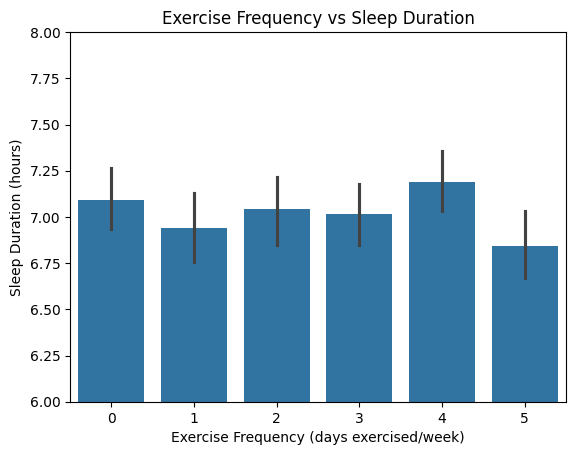

In [12]:
sns.barplot(
    data=df,
    x="ExerciseFrequency",
    y="SleepDuration"
)
plt.ylim(6, 8) 

plt.title("Exercise Frequency vs Sleep Duration")
plt.ylabel("Sleep Duration (hours)")
plt.xlabel("Exercise Frequency (days exercised/week)")

plt.show()

Participants who exercised around 4 days a week tend to get the most sleep on average, showing that regular physical activity may support better sleep quality AND duration. However sleep declines slightly for those who exercise 5 days per week showing that moderate regular exercise (3-4) is linked with optimal sleep duration.

## Overall Insights

The data visualizations show that different lifestyle and demographic factors influence sleep in different ways. Exercise frequency shows a moderate positive relationship with sleep duraton, with participants who exercise regularly tending to sleep slightly longer. This suggests that maintaining an active lifestyle could contribute to better sleep habits. 

In contrast, gender, caffeine consumption, and smoking status show only small differences in average sleep duration. Factors show high variability and overlapping patterns indicating that they are not strong independent predictors of how long individuals sleeps.

Alcohol consumption stands out in having the most consistent impact on sleep quality. As alcohol inttake increases, sleep efficiency tends to decrease, suggesting that alcohol ruins normal sleep patterns and overall restfulness. Compared to other factors, alcohol shows the clearest negative association with sleep outcomes.

Overall, the results suggest that behavioural choices (exercise and substance use) play a more important role in sleep health than demographic characteristics in this dataset."

## Conclusion

This analysis demonstrates that sleep duration and sleep quality are influenced by multiple factors rather than one variable. While regular exercise is associated with improved sleep, most demographic and habit-related factors such as gender, caffeine intake, and smoking show limited effects on sleep duration.

Alcohol comsumption however, exhibits a strong and more consistent negative relationship with sleep efficiency, highlighting its disruptive role in sleep quality. These findings emphasize the importance of healthy lifestyle habits in supporting high sleep quality.

In conclusion, individuals seeking to improve their sleep may benefit most from maintaining consistent physical activity and limiting alcohol intake. Although this sutdy does provide strong insights, utilizing a wide range of different datasets would be able to further enhance the understanding of how different behaviours and environmental factors impact sleep patterns.